In [1]:
import time

from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.subplots

import numpy as np
import matplotlib.pyplot as plt
import dpx_control_hw as dch
import dpx_energy_calibration

In [2]:
MODEL_FILE = '../models/calibration_large.h5'
PARAMETERS_FILE = '../models/parameters.json'
CONFIG = '../../measure/config_38.conf'

## Connect Dosepix

In [3]:
port = dch.find_port()
if port is None:
    port = '/dev/ttyACM1'

dpx = dch.Dosepix(
    port_name=port,
    config_fn=CONFIG,
    thl_calib_fn=None,
    params_fn=None,
    bin_edges_fn=None
)

## Energy Calibration

In [4]:
dec = dpx_energy_calibration.DPXEnergyCalibration(
    dpx,
    MODEL_FILE,
    PARAMETERS_FILE
)

2022-04-29 16:45:14.645836: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-29 16:45:15.210660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4469 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [18]:
gen = dec.measure(
    frame_time=0,
    eval_after_frames=1000
)

Exception ignored in: <generator object DPXMeasurement.measure_tot_gen at 0x7fb4302b5580>
Traceback (most recent call last):
  File "/tmp/ipykernel_2590839/2430013936.py", line 1, in <module>
RuntimeError: generator ignored GeneratorExit


In [ ]:
while True:
    energy, counts = next(gen)
    energy, counts = np.nan_to_num(energy), np.nan_to_num(counts)
    energy_filt = energy > 80
    energy, counts = energy[energy_filt], counts[energy_filt]
    '''
    try:
        plt.hist2d(energy, counts)
    except:
        pass
    '''

In [9]:
energy.shape

(70724,)

(array([4.0669e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  3.56930977,  7.13861954, 10.70792931, 14.27723908,
        17.84654885, 21.41585862, 24.98516839, 28.55447816, 32.12378793,
        35.69309771]),
 <BarContainer object of 10 artists>)

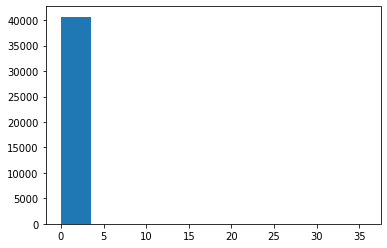

In [19]:
plt.hist(counts)

In [10]:
256 * 400

102400